# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Importing Data

In [2]:
df = pd.read_csv("wholesale-customers-data.csv")

# EDA

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.drop(['Region','Channel'],axis=1,inplace=True)

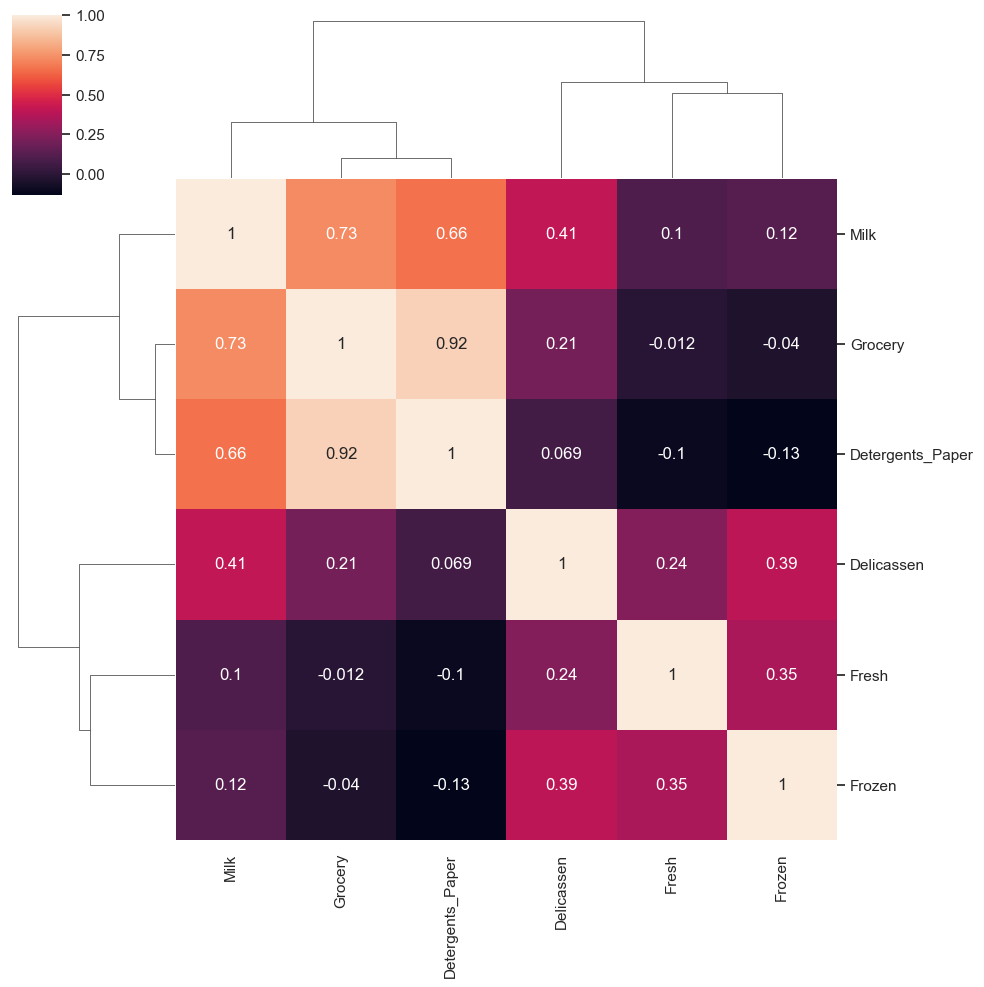

In [6]:
sns.clustermap(df.corr(),annot=True)

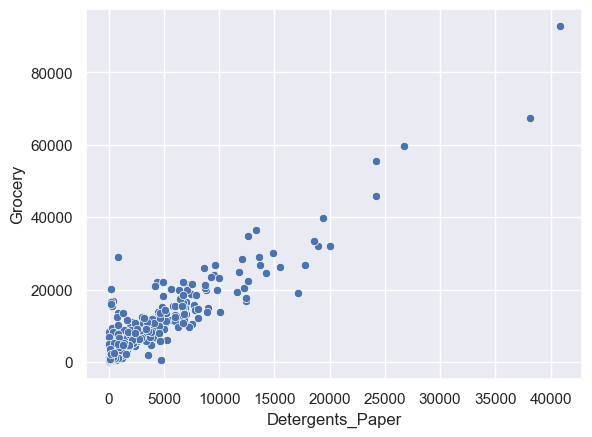

In [7]:
plt.Figure(figsize=(10,6))
sns.scatterplot(x=df.Detergents_Paper,y=df.Grocery)
plt.show()

# Preprocessing Data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
model = StandardScaler()

In [10]:
scaled_X= model.fit_transform(df)

# Build and Prediction Models


In [11]:
from sklearn.cluster import DBSCAN

In [22]:
dbscan = DBSCAN(eps=2)
dbscan.fit_predict(scaled_X)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [23]:
df["clusters"] = dbscan.labels_

In [24]:
df[df["clusters"] == -1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
23,26373,36423,22019,5154,4337,16523,-1
47,44466,54259,55571,7782,24171,6465,-1
61,35942,38369,59598,3254,26701,2017,-1
65,85,20959,45828,36,24231,1423,-1
71,18291,1266,21042,5373,4173,14472,-1
85,16117,46197,92780,1026,40827,2944,-1
86,22925,73498,32114,987,20070,903,-1
87,43265,5025,8117,6312,1579,14351,-1
93,11314,3090,2062,35009,71,2698,-1
181,112151,29627,18148,16745,4948,8550,-1


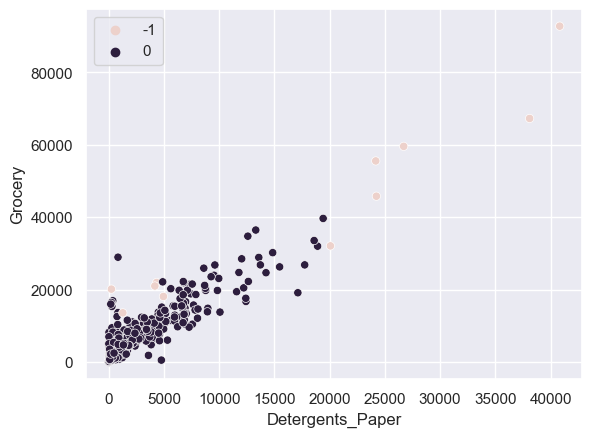

In [25]:
plt.Figure(figsize=(10,6))
sns.scatterplot(x=df.Detergents_Paper,y=df.Grocery,hue=dbscan.labels_)
plt.show()

# Chosen Value of Epsilon

In [26]:
outliers_presantage =[]

for i in np.linspace(0.05,3,100):
    dbscan = DBSCAN(eps=i)
    dbscan.fit(scaled_X)
    noise = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outliers_presantage.append(noise)
# print(outliers_presantage)

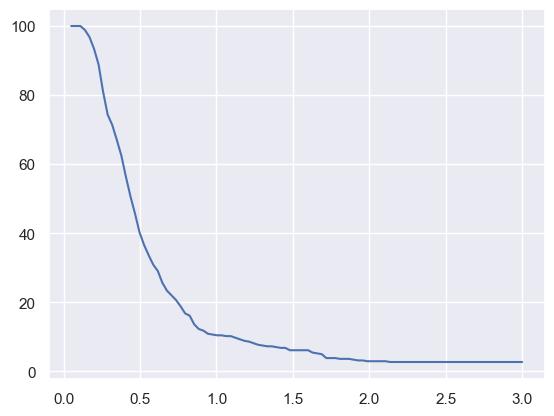

In [17]:
plt.Figure(figsize=(10,6))
sns.lineplot(x=np.linspace(0.05,3,100),y=outliers_presantage)
plt.show()

# Thank you 🥰🥰